In [103]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Part A: one solution

Assuming that I want to find the $w$ that minimizes $\frac{1}{2n}||Xw - y||_2^2$. In this part, X is full rank, and $y \in range(X)$

In [104]:
X = np.random.normal(scale = 20, size=(100,10))
print(np.linalg.matrix_rank(X)) # confirm that the matrix is full rank
w = np.random.normal(scale = 10, size = (10,1))
y = X.dot(w)

10


In [105]:
def sgd(X, y, w_actual, threshold, max_iterations, step_size, gd=False):
    if isinstance(step_size, float):
        step_size_func = lambda i: step_size
    else:
        step_size_func = step_size
    
    w_guesses = [np.zeros((X.shape[1], 1)) for _ in range(10)]
    n = X.shape[0]
    error = []
    it = 0
    above_threshold = True
    previous_w = np.array(w_guesses)
    
    if gd:
        # precompute for gd
        XTX = X.T @ X
        XTy = X.T @ y
    
    while it < max_iterations and above_threshold:
        it += 1
        curr_error = 0
        for j in range(len(w_guesses)):
            if gd:
                # gradient descent
                sample_gradient = (XTX @ w_guesses[j] - XTy)/n
            else:
                # stochastic gradient descent
                index = np.random.choice(X.shape[0])
                sample_gradient = X[index:index+1,:].T @ X[index:index+1,:] @ w_guesses[j] - \
                                        X[index:index+1,:].T @ y[index:index+1]
            w_guesses[j] -= step_size_func(it)*sample_gradient
            curr_error += np.linalg.norm(w_guesses[j]-w_actual)
        error.append(curr_error/10)
        
        diff = np.array(previous_w) - np.array(w_guesses)
        diff = np.mean(np.linalg.norm(diff, axis=1))
        above_threshold = (diff > threshold)
        previous_w = np.array(w_guesses)
    return w_guesses, error

In [106]:
its = 5000
w_guesses, error = sgd(X, y, w, 1e-10, its, 0.0001)

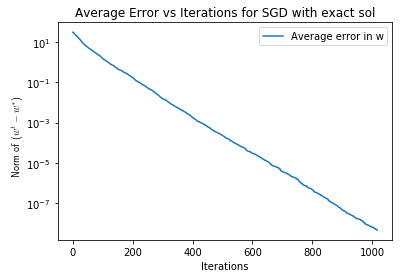

In [107]:
iterations = [i for i in range(len(error))]
#plt.semilogy(iterations, error, label = "Average error in w")
plt.semilogy(iterations, error, label = "Average error in w")
plt.xlabel("Iterations")
plt.ylabel("Norm of ($w^t - w^*$)",  usetex=True)
plt.title("Average Error vs Iterations for SGD with exact sol")
plt.legend()
plt.show()

In [108]:
print("Required iterations: ", len(error))
average_error = np.mean([np.linalg.norm(w-w_guess) for w_guess in w_guesses])
print("Final average error: ", average_error)

Required iterations:  1018
Final average error:  4.64368833264e-09


# Part B: No solutions, constant step size

In [109]:
y2 = y + np.random.normal(scale=5, size = y.shape)
w=np.linalg.inv(X.T @ X) @ X.T @ y2

In [110]:
its = 5000
w_guesses2, error2 = sgd(X, y2, w, 1e-5, its, 0.0001)
w_guesses3, error3 = sgd(X, y2, w, 1e-5, its, 0.00001)
w_guesses4, error4 = sgd(X, y2, w, 1e-5, its, 0.000001)

In [111]:
w_guess_gd, error_gd = sgd(X, y2, w, 1e-5, its, 0.001, True)

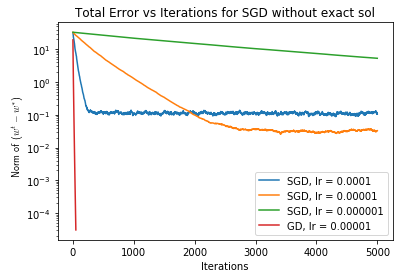

In [112]:
plt.semilogy([i for i in range(len(error2))], error2, label="SGD, lr = 0.0001")
plt.semilogy([i for i in range(len(error3))], error3, label="SGD, lr = 0.00001")
plt.semilogy([i for i in range(len(error4))], error4, label="SGD, lr = 0.000001")
plt.semilogy([i for i in range(len(error_gd))], error_gd, label="GD, lr = 0.00001")
plt.xlabel("Iterations")
plt.ylabel("Norm of ($w^t - w^*$)",  usetex=True)
plt.title("Total Error vs Iterations for SGD without exact sol")
plt.legend()
plt.show()

In [113]:
print("Required iterations, lr = 0.0001: ", len(error2))
average_error = np.mean([np.linalg.norm(w-w_guess) for w_guess in w_guesses2])
print("Final average error: ", average_error)

print("Required iterations, lr = 0.00001: ", len(error3))
average_error = np.mean([np.linalg.norm(w-w_guess) for w_guess in w_guesses3])
print("Final average error: ", average_error)

print("Required iterations, lr = 0.000001: ", len(error4))
average_error = np.mean([np.linalg.norm(w-w_guess) for w_guess in w_guesses4])
print("Final average error: ", average_error)

print("Required iterations, GD: ", len(error_gd))
average_error = np.mean([np.linalg.norm(w-w_guess) for w_guess in w_guess_gd])
print("Final average error: ", average_error)

Required iterations, lr = 0.0001:  5000
Final average error:  0.10441580305
Required iterations, lr = 0.00001:  5000
Final average error:  0.0326324876216
Required iterations, lr = 0.000001:  5000
Final average error:  5.32258933955
Required iterations, GD:  49
Final average error:  3.04873852836e-05


# Part C: No solutions, decreasing step size

In [114]:
its = 5000
def step_size(step):
    if step < 500:
        return 1e-4 
    if step < 1500:
        return 1e-5
    if step < 3000:
        return 3e-6
    return 1e-6

w_guesses_variable, error_variable = sgd(X, y2, w, 1e-10, its, step_size, False)

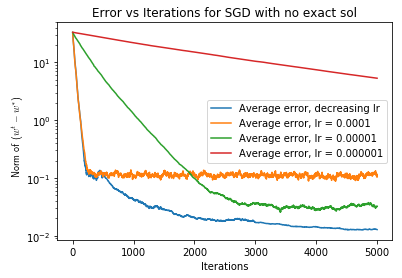

In [115]:
plt.semilogy([i for i in range(len(error_variable))], error_variable, label="Average error, decreasing lr")
plt.semilogy([i for i in range(len(error2))], error2, label="Average error, lr = 0.0001")
plt.semilogy([i for i in range(len(error3))], error3, label="Average error, lr = 0.00001")
plt.semilogy([i for i in range(len(error4))], error4, label="Average error, lr = 0.000001")

plt.xlabel("Iterations")
plt.ylabel("Norm of ($w^t - w^*$)",  usetex=True)
plt.title("Error vs Iterations for SGD with no exact sol")
plt.legend()
plt.show()

In [116]:
print("Required iterations, variable lr: ", len(error_variable))
average_error = np.mean([np.linalg.norm(w-w_guess) for w_guess in w_guesses_variable])
print("Average error with decreasing lr:", average_error)

Required iterations, variable lr:  5000
Average error with decreasing lr: 0.0127947031605
